In [2]:
!pip install pillow
!pip install scikit-image

In [33]:
from PIL import Image, ImageEnhance
img= Image.open("abc.jpg")
img.show()

In [24]:
img.save("temp.jpeg")
dim=(10,10,180,220)
crop_img=img.crop(dim)
crop_img.show()

In [25]:
img.getpixel((100,100))
img.convert("L").getpixel((100,100))

199

In [26]:
grayscale = img.convert("L")
grayscale.show()

In [29]:
resize_img = img.resize((200,200))
resize_img.show()

rotate_img = img.rotate(237)
rotate_img.show()


In [31]:
enhancer = ImageEnhance.Contrast(img)
enhancer.enhance(2).show()

In [32]:
enhancer = ImageEnhance.Brightness(img)
enhancer.enhance(2).show()

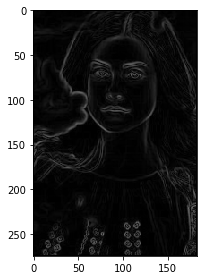

In [37]:
from skimage import io
from skimage import filters
from skimage import color
img = io.imread("temp.jpeg")
img = color.rgb2gray(img)
edge=filters.sobel(img)
io.imshow(edge)
io.show()

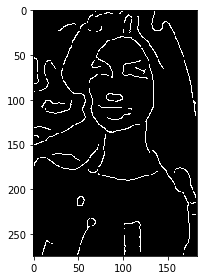

In [38]:
from skimage import feature

edge = feature.canny(img,3)
io.imshow(edge)
io.show()

In [39]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
 
#Get MNIST Dataset
print('Getting MNIST Data...')
mnist = fetch_openml('mnist_784')
print('MNIST Data downloaded!')

Getting MNIST Data...
MNIST Data downloaded!


In [41]:
images = mnist.data 
labels = mnist.target 
 
#Preprocess the images 
images = normalize(images, norm='l2') #You can use l1 norm too
 
#Split the data into training set and test set
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.25, random_state=17)
 
#Setup the neural network that we want to train on 
nn = MLPClassifier(hidden_layer_sizes=(200), max_iter=60, solver='sgd', learning_rate_init=0.001, verbose=True)
 
#Start training the network 
print('NN Training started...')
nn.fit(images_train, labels_train)
print('NN Training completed!')
 
#Evaluate the performance of the neural network on test data 
print('Network Performance: %f' % nn.score(images_test, labels_test))

NN Training started...
Iteration 1, loss = 2.29050883
Iteration 2, loss = 2.24778972
Iteration 3, loss = 2.20438639
Iteration 4, loss = 2.15609290
Iteration 5, loss = 2.10060151
Iteration 6, loss = 2.03677325
Iteration 7, loss = 1.96425038
Iteration 8, loss = 1.88356357
Iteration 9, loss = 1.79647082
Iteration 10, loss = 1.70526768
Iteration 11, loss = 1.61251043
Iteration 12, loss = 1.52064746
Iteration 13, loss = 1.43167481
Iteration 14, loss = 1.34715916
Iteration 15, loss = 1.26819797
Iteration 16, loss = 1.19545584
Iteration 17, loss = 1.12904876
Iteration 18, loss = 1.06884201
Iteration 19, loss = 1.01461153
Iteration 20, loss = 0.96592008
Iteration 21, loss = 0.92214910
Iteration 22, loss = 0.88283585
Iteration 23, loss = 0.84738594
Iteration 24, loss = 0.81538200
Iteration 25, loss = 0.78641863
Iteration 26, loss = 0.76006648
Iteration 27, loss = 0.73611423
Iteration 28, loss = 0.71421022
Iteration 29, loss = 0.69413390
Iteration 30, loss = 0.67565095
Iteration 31, loss = 0.658

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Network Performance: 0.890000


In [42]:
!pip install opencv-python